## Important instruction

For programming exercises that only editing, only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 7: Clustering using Gaussian Mixture Model (GMM)

The objective of this question is to implement Gaussian Mixture Model (GMM) for clustering of a shopping mall dataset. Follow the given instructions below:

1. Load the Dataset from https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv

2. **Preprocess the Data**:
   - Drop the 'ID' column since it is not needed for clustering. Only numerical features are retained for clustering purposes.
   - The features are standardized using the ```StandardScaler``` from ```scikit-learn``` to ensure that each feature has a mean of 0 and a standard deviation of 1.

3. **Implement Gaussian Mixture Model (GMM)**:
   - Apply Gaussian Mixture Model (GMM) to the preprocessed data using ```GaussianMixture``` from ```sklearn.mixture```.
   - Try different values for ```n_components``` parameter to find the most appropriate value.
   - The ```random_state``` parameter is set to 99 for reproducibility.
  - Train the model using fit method.

5. **Visualize the Clusters**:
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data to two components for visualization purposes.
   - Plot the PCA-transformed data using a scatter plot.
   - Color each point on the scatter plot according to the cluster assigned by the GMM model. (Use 'viridis' color map to represent different clusters.)
   - The plot should include labels for the x and y axes, as well as a title.


For more information, refer to the following resources:
- Section **7.4: Expectation-Maximization Algorithm** and **7.5: Mixtures of Latent Variable Models** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-expectation-maximization-algorithm/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

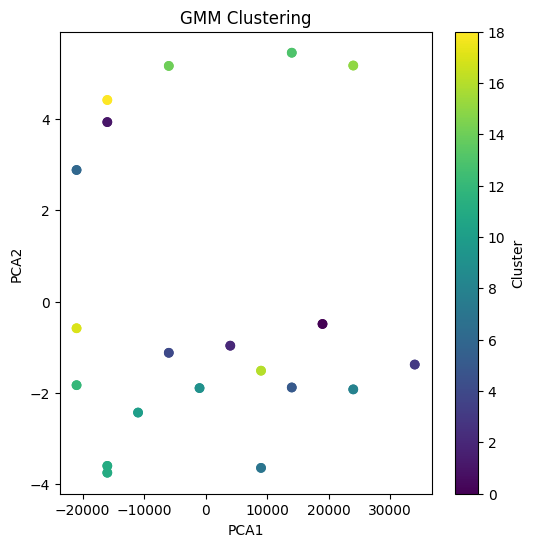

In [40]:
############################################################
#Write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv')
data=data.drop(['ID'], axis=1)
scale = StandardScaler()
scaleData= scale.fit_transform(data)

# Number of components 
n = range(1,20)
# Random state
r = 99
currScore = -np.inf
bestScore = None
for i in n:
    model = GaussianMixture(n_components=i, random_state=r)
    model.fit(data)
    score = model.score(data)
    if score > currScore:
        currScore = score
        bestScore = model

pca = PCA(n_components=2)
pcaData = pca.fit_transform(data)

plt.figure(figsize=(6,6))
plt.scatter(pcaData[:,0], pcaData[:,1], c=bestScore.predict(data))
plt.title('GMM Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()



############################################################

In [41]:
################## FOR REFERENCE ONLY ##################

# For additional analysis on the clusters...

# Assign cluster labels to the original dataset
data['Cluster'] = gmm.predict(X_scaled)

# Generate summary statistics for each cluster
summary_stats = data.groupby('Cluster').describe()

# Display the summary statistics
summary_stats.head()

V1                                                  V2            \
        count      mean       std  min   25%  50%  75%  max count      mean   
Cluster                                                                       
0         8.0  5.500000  0.534522  5.0  5.00  5.5  6.0  6.0   8.0  3.750000   
1         4.0  3.500000  0.577350  3.0  3.00  3.5  4.0  4.0   4.0  5.500000   
2         6.0  1.666667  0.516398  1.0  1.25  2.0  2.0  2.0   6.0  2.666667   
3         2.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0   2.0  7.000000   
4         2.0  6.000000  0.000000  6.0  6.00  6.0  6.0  6.0   2.0  5.000000   

         ...   Income          Mall.Visits                                 \
         ...      75%      max       count mean       std  min   25%  50%   
Cluster  ...                                                                
0        ...  61250.0  65000.0         8.0  3.0  0.755929  2.0  2.75  3.0   
1        ...  40000.0  40000.0         4.0  4.5  0.577350  4.0  4.00  4.5   
2        ...  37500.0  40000.0         6.0  1.0  0.894427  0.0  0.25  1.0   
3        ...  25000.0  25000.0         2.0  5.0  0.000000  5.0  5.00  5.0   
4        ...  55000.0  55000.0         2.0  3.0  0.000000  3.0  3.00  3.0   

                    
          75%  max  
Cluster             
0        3.25  4.0  
1        5.00  5.0  
2        1.75  2.0  
3        5.00  5.0  
4        3.00  3.0  

[5 rows x 64 columns]

### **Answer the following question with a brief reasoning.**

What are the reasonable number of clusters and upon examining the plot (or, along with summary_stats) were you able to observe the most influencing features for the clustering?

It seems a resaonable number of clusters is 2 or 3. There's a lot of points in the bottom section of the graph that we could group together as one, then in the top left corner theres a group of four that could be grouped together as well. The other two can be grouped in with the four points, but they have a little more distance between them, making it look like a third cluster. Also it seems the most influencing features for the clustering are the income and the visit frequency. The income is the most important feature, as it is the most spread out, and the visit frequency is the second most important feature, as it is the second most spread out. The age is the least important feature, as it is the least spread out.

## Question 8: Nonparametric Density Estimation - Histogram

The objective of this question is to implement Histogram technique of non-parametric density estimation for analyzing the distribution of a given dataset. Follow the given instructions below:

1. For importing data, use ```fetch_openml``` from ```sklearn.datasets```.
  - Set the ```data_id``` to 506.
  - Assign ```'target'``` attribute of the dataset to ```data``` variable.
2. The function ```hist_pdf``` is defined with x, data and n_bins as parameters.
x is defined as the value at which the probability density function (PDF) will be evaluated, data parameter denotes the dataset for which the density estimation will be performed and n_bins denotes the number of bins to use for the histogram calculation.
  
  - Set ```n_bins``` to 5.

  - Use NumPy's ```np.histogram``` function to calculate the histogram of the input data. Specify the number of bins (bins) using the ```n_bins``` parameter. Set the ```density``` parameter to ```True``` to compute the normalized density (PDF).
  
  - Calculate Bin Width: Compute the width of each bin (```bin_width```) by subtracting the position of the first bin from the position of the second bin.This step ensures that we know the size of each bin in our histogram.

3. Plot the Density Estimation:
  - Provide the ```xvals``` array as the x-values of the plot and the ```pdf``` array (calculated PDF values) as the y-values of the plot.
  - Add appropriate labels, title and legend to plot.

For more information, refer to the following resources:
- Section **8.2.1: Histogram Estimator** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


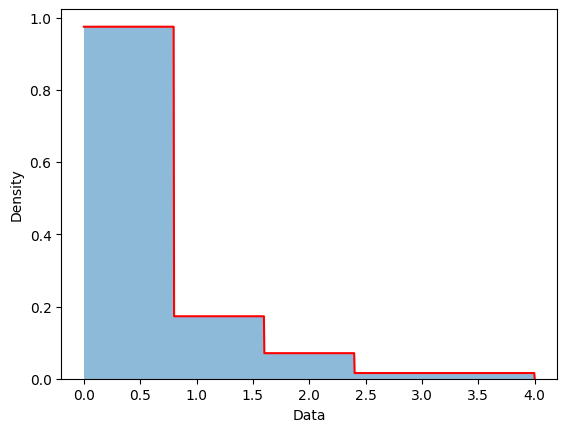

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

############################################################
#Write your code here
#Load data
data = fetch_openml(data_id=506)
data = data.target
############################################################


############################################################
#Write your code here
def hist_pdf(x, data, n_bins=5):
    hist, bins = np.histogram(data, bins=n_bins, density=True)
    bin_width = bins[1] - bins[0]
############################################################
    bin_index = np.digitize(x, bins) - 1
    pdf = hist[bin_index] if 0 <= bin_index < n_bins else 0
    return pdf

# histogram
xvals = np.linspace(min(data), max(data), 1000)
pdf = [hist_pdf(x, data) for x in xvals]


############################################################
#Write your code here
#Plot the Density Estimation

plt.hist(data, bins=5, density=True, alpha=0.5)
plt.plot(xvals, pdf, 'r')
plt.xlabel('Data')
plt.ylabel('Density')
plt.show()
############################################################

## Question 9: Outlier Detection - Local outlier factor (LOF)

Implement outlier detection using the Local Outlier Factor (LOF) algorithm on iris dataset.

1. Load iris dataset using `load_iris` and assign `iris.data` to variable X.

2. Implement LOF Algorithm:
   - Instantiate the `LocalOutlierFactor` class with appropriate parameters. Experiment and adjust the `n_neighbors` and `contamination` parameters based on the characteristics of the outliers.
   - Fit the LOF model to the scaled features.
   - Use the fitted LOF model to predict outliers (`outlier_scores`) in the dataset.

3. Run 3 experiments varying `n_neighbors` and `contamination` parameters and find the set of parameters that best identifies the outliers.

For more information, refer to the following resources:

- Sections **8.7: Outlier Detection**  of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- https://www.geeksforgeeks.org/novelty-detection-with-local-outlier-factor-lof-in-scikit-learn/

n_neighbors=5, contamination=0.05, n_outliers=8
n_neighbors=5, contamination=0.1, n_outliers=15
n_neighbors=5, contamination=0.2, n_outliers=30
n_neighbors=12, contamination=0.05, n_outliers=8
n_neighbors=12, contamination=0.1, n_outliers=15
n_neighbors=12, contamination=0.2, n_outliers=30
n_neighbors=17, contamination=0.05, n_outliers=8
n_neighbors=17, contamination=0.1, n_outliers=15
n_neighbors=17, contamination=0.2, n_outliers=30


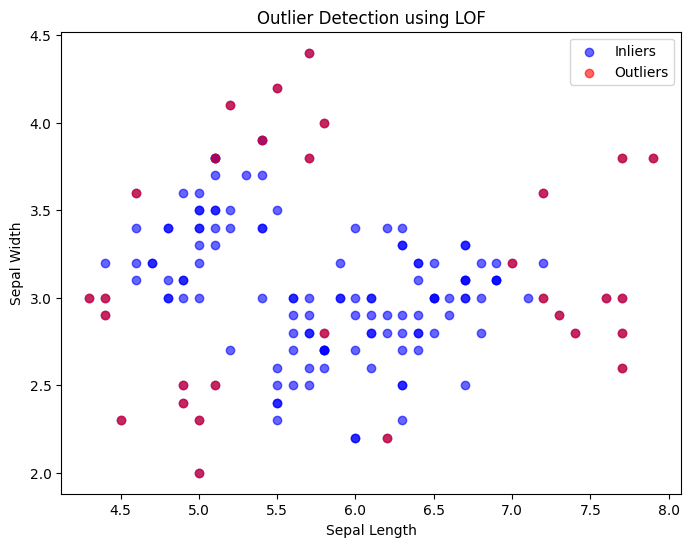

Number of outliers detected: 30


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor
############################################################
#Write your code here
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Implement LOF algorithm
n_values = [5,12,17]
contamination = [0.05, 0.1, .2]
# contamination = [0.05, 0.1, .5]
best_combo = None
scores = []

for n in n_values:
    for c in contamination:
        lof = LocalOutlierFactor(n_neighbors=n, contamination=c)
        outlier_scores = lof.fit_predict(X)
        n_outliers = np.sum(outlier_scores == -1)
        print(f"n_neighbors={n}, contamination={c}, n_outliers={n_outliers}")

############################################################
outlier_mask = outlier_scores == -1

# Visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6, label='Inliers')
plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', alpha=0.6, label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Outlier Detection using LOF')
plt.legend()
plt.show()

# Discuss findings and effectiveness of LOF algorithm
print("Number of outliers detected:", np.sum(outlier_mask))

### **Answer the following question with a brief reasoning.**
Mention the set of values for the parameters n_neighbors and contamination that performed the best in outlier detection, along with the reason for why it outperformed the other two experiments.

In the different experiments the parameters that performed well were n_neighbors = 5, 17, 20, but only with the contamination = 0.15. Could it be that the contamination parameter is the most important parameter in this case? Because if I were to raise the contamination parameter to 0.2, the results would be the same as with these n_neighbors values. It could also mean that as I increase the contamination parameter it becomes more proportional to the amount of outliers in the dataset. 

After experimenting a bit with the contamination parameter, I found that if we go over .5 our code begins to break, but if I set it at .5, the results don't break but instead we catch an outlier detection of 75. This could mean that at .5 we are catching the majority of the outliers in the dataset, so it was somewhat proportional to the amount of outliers in the dataset. Compared to the other experiments, they seem to have a lower contamination parameter, which could mean that they are catching less outliers in the dataset, but still gave out the same output regardless of the n_neighbors parameter.